# Hyperspectral Imaging Simulator: Input Testing Notebook

Notebook to run mitsuba 3 render software (__[Documentation](https://mitsuba.readthedocs.io/en/latest/index.html)__) with developed Input code.



Version: 1.1<br>
Last Updated: 01/09/2022<br>
Author: Cameron Leslie<br>


Version Notes:




## Imports

In [16]:
import mitsuba as mi
import numpy as np
import matplotlib.pyplot as plt

## Functions

## Render Settings

Only variant available for spectral renders in pip variant is "scalar_spectral". This should always be used for now.

In [17]:
mi.set_variant('scalar_spectral')

## Construct Scene

In [18]:
# Chosen Parameters
spp = 16
width = 1920
height = 1080
max_depth = 2
fov = 3.69
ax1 = 10
ax2 = -156
ax3 = 125


# Example dict outside scene
integrator = ({
    "integrator": {
        "type": "path",
        "max_depth": max_depth
    }
})


# Write scene dict
scene_dict = ({
    "type": "scene",

    # Sensor:
    "sensor": {
        "type": "perspective",
        # Aperture radius
        #"aperture_radius": 0.2,
        # Field of View
        "fov": fov,
        # Transformation to position sensor
        "to_world": mi.ScalarTransform4f.look_at(
            origin=[-100, 0, 0],
            target=[0, 0, 0],
            up=[0, 0, 1]
        ),

        # Sensor Film
        "film": {
            "type": "specfilm",
            "width": width,
            "height": height,
            "band_1": {
                "type": "spectrum",
                "value": [(400.0, 0.9), (500.0, 0.9)]
            },
            "band_2": {
                "type": "spectrum",
                "value": [(500.0, 0.9), (600.0, 0.9)]
            },
            "band_3": {
                "type": "spectrum",
                "value": [(600.0, 0.9), (700.0, 0.9)]
            }
        },
        # Sensor Sampler
        "sampler": {
            "type": "stratified",
            "sample_count": spp,
        }
    },

    # Emitter
    #"emitter": {
    #    'type': 'envmap',
    #    'filename': '..\\Scenes\\matpreview\\matpreview.exr'
    #},

    # Emitter
    "emitter": {
        'type': 'constant',
        'radiance': {
            'type': 'spectrum',
            'value': 1.0,
        }
    },  



    # Cube #1
    "cube_1": {
        "type": "ply",
        "filename": "Geometry\\Cube\\Cube.ply",

        "to_world": mi.ScalarTransform4f.rotate(axis=[1, 0, 0], angle=ax1).rotate(axis=[0, 1, 0], angle=ax2).rotate(axis=[0, 0, 1], angle=ax3),

        "simple_bsdf": {
            "type": "diffuse",
            "reflectance": {
                "type": "rgb",
                "value": [0.2, 0.7, 0.2]
            #    "type": "spectrum",
            #    "filename": "..\\Spectra\\Aluminium\\aluminium.spd"
            }
        }
    },

    # Cube #2
    "cube_2": {
        "type": "ply",
        "filename": "Geometry\\Cube\\Cube_001.ply",

        "to_world": mi.ScalarTransform4f.rotate(axis=[1, 0, 0], angle=ax1).rotate(axis=[0, 1, 0], angle=ax2).rotate(axis=[0, 0, 1], angle=ax3),

        "simple_bsdf": {
            "type": "diffuse",
            "reflectance": {
                "type": "rgb",
                "value": [0.7, 0.25, 0.2]
            }
        }
    },

    # Cube #3
    "cube_3": {
        "type": "ply",
        "filename": "Geometry\\Cube\\Cube_002.ply",

        "to_world": mi.ScalarTransform4f.rotate(axis=[1, 0, 0], angle=ax1).rotate(axis=[0, 1, 0], angle=ax2).rotate(axis=[0, 0, 1], angle=ax3),
        #"to_world": mi.ScalarTransform4f.lookat(origin=)

        "simple_bsdf": {
            "type": "diffuse",
            "reflectance": {
                "type": "rgb",
                "value": [0.2, 0.25, 0.7]
            }
        }
    }
})

# Combine dicts to complete scene
scene_dict.update(integrator)

# Instantiate scene 
scene = mi.load_dict(scene_dict)

params = mi.traverse(scene)
print(params)

#params[""]

SceneParameters[
  ------------------------------------------------------------------------------------
  Name                             Flags    Type            Parent
  ------------------------------------------------------------------------------------
  cube_1.bsdf.reflectance.value    ∂        Color3f         SRGBReflectanceSpectrum
  cube_1.vertex_count                       int             PLYMesh
  cube_1.face_count                         int             PLYMesh
  cube_1.faces                              ArrayXu         PLYMesh
  cube_1.vertex_positions          ∂, D     ArrayXf         PLYMesh
  cube_1.vertex_normals            ∂, D     ArrayXf         PLYMesh
  cube_1.vertex_texcoords          ∂        ArrayXf         PLYMesh
  cube_2.bsdf.reflectance.value    ∂        Color3f         SRGBReflectanceSpectrum
  cube_2.vertex_count                       int             PLYMesh
  cube_2.face_count                         int             PLYMesh
  cube_2.faces                

## Render Scene

In [19]:
image = mi.render(scene)
print(image)


TensorXf(shape=(1080, 1920, 3))


## Export / Visualise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


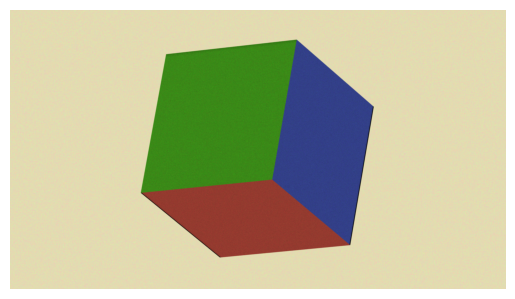

In [20]:
image_bmp = mi.Bitmap(image)
bitmap = plt.imshow(image_bmp); plt.axis('off');
